# Visualization of NN Learning Process

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import torch.nn.functional as F

In [4]:
#using make_moon datasets 
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons
x,y = datasets.make_moons(200, noise=0.20)

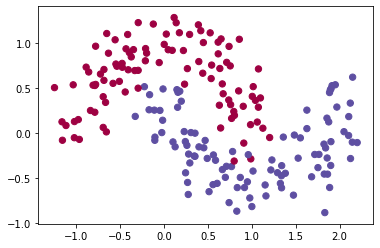

In [7]:
plt.scatter(x[:,0],x[:,1], c=y, s=40,cmap = plt.cm.Spectral)
plt.show()

In [17]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)
y.shape

torch.Size([200])

In [9]:
class FeedForward(torch.nn.Module):
    def __init__(self,input_features,hidden_layer,output):
        super(FeedForward,self).__init__()
        self.hidden=nn.Linear(input_features,hidden_layer)
        self.out=nn.Linear(hidden_layer,output)
    def forward(self,x):
        x=self.hidden(x)
        x=F.relu(x)
        x=self.out(x)
        return x      
        

In [11]:
model = FeedForward(input_features=2,hidden_layer=50,output=2)
optimizer = torch.optim.SGD(model.parameters(),lr=0.02)
loss_fn = torch.nn.CrossEntropyLoss()

In [41]:
out=model(x)
max_value, prediction = torch.max(out,1)
print(prediction)
accuracy = (prediction==y).numpy().sum()/y.numpy().size
print(accuracy)

tensor([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0])
0.695


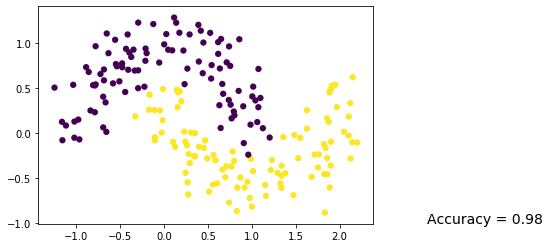

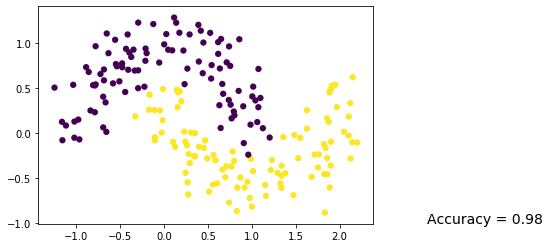

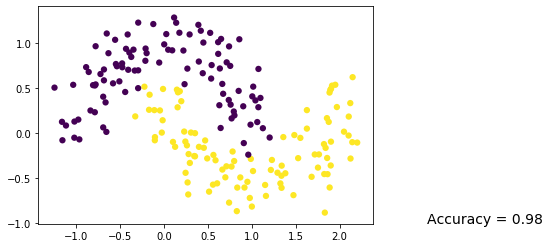

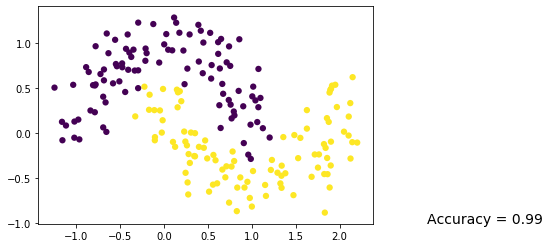

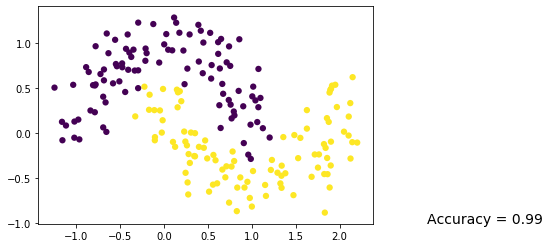

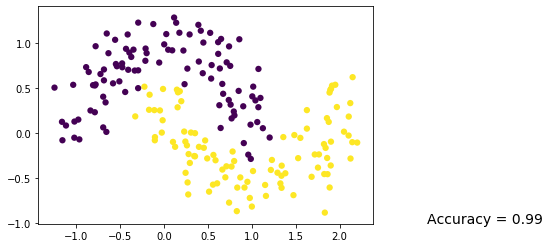

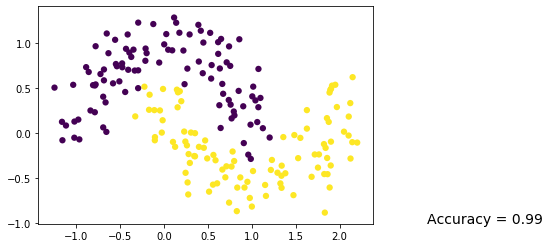

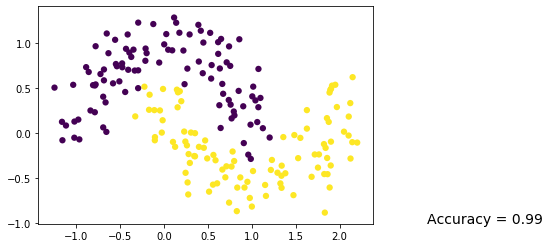

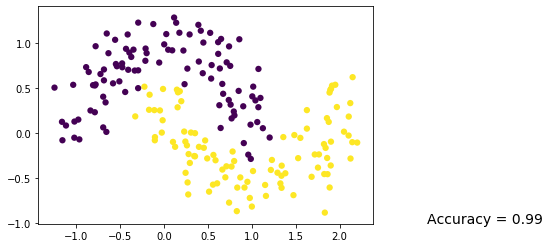

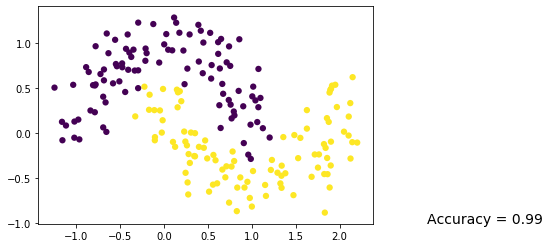

In [48]:
#initially the model was not learning and returing same accuracy at all epochs. That was due to wrong useage of zero_grad it is a method and we should call with parantheses
# same appies to optimizer.step()
# we should use plotting decision boundary to visualize the evolution over epochs
plt.ion()
for epoch in range(10000):
    out=model(x)
    loss=loss_fn(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()        
plt.show()